Loading and Visualizing Data ...

Mounted at /content/drive


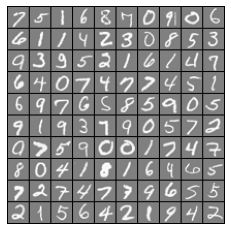

Program paused. Press enter to continue.


Loading Saved Neural Network Parameters ...


Training Set Accuracy: 
 97.52
Program paused. Press enter to continue.



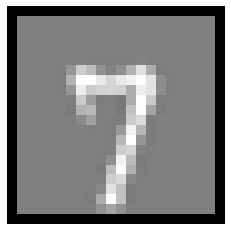


Neural Network Prediction: Digit [7]

Paused - press enter to continue, q to exit:


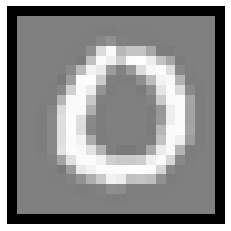


Neural Network Prediction: Digit [0]

Paused - press enter to continue, q to exit:


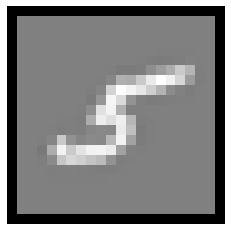


Neural Network Prediction: Digit [5]

Paused - press enter to continue, q to exit:


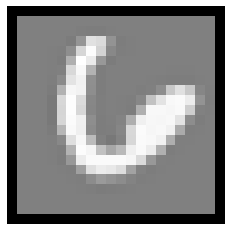


Neural Network Prediction: Digit [6]

Paused - press enter to continue, q to exit:


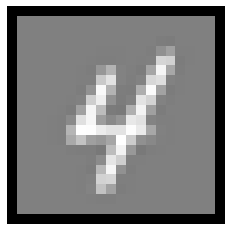


Neural Network Prediction: Digit [4]

Paused - press enter to continue, q to exit:


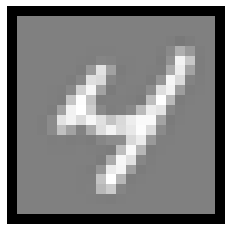


Neural Network Prediction: Digit [4]

Paused - press enter to continue, q to exit:


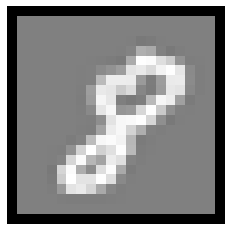


Neural Network Prediction: Digit [8]

Paused - press enter to continue, q to exit:


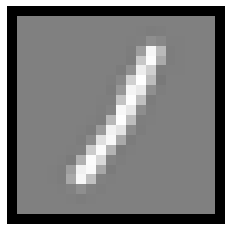


Neural Network Prediction: Digit [1]

Paused - press enter to continue, q to exit:


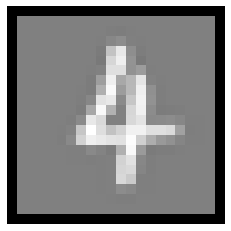


Neural Network Prediction: Digit [4]

Paused - press enter to continue, q to exit:


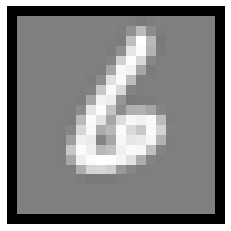


Neural Network Prediction: Digit [6]

Paused - press enter to continue, q to exit:


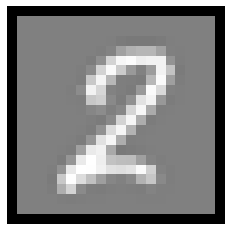


Neural Network Prediction: Digit [2]

Paused - press enter to continue, q to exit:


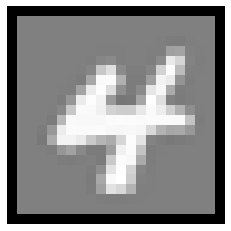


Neural Network Prediction: Digit [4]

Paused - press enter to continue, q to exit:q


In [1]:
## Machine Learning Online Class - Exercise 3 | Part 2: Neural Networks

#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions 
#  in this exericse:
#
#     lrCostFunction.m (logistic regression cost function)
#     oneVsAll.m
#     predictOneVsAll.m
#     predict.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#

## Initialization
#clear ; close all; clc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math
from scipy import optimize
from scipy.io import loadmat



def displayData(X, example_width=None):
#DISPLAYDATA Display 2D data in a nice grid
#   [h, display_array] = DISPLAYDATA(X, example_width) displays 2D data
#   stored in X in a nice grid. It returns the figure handle h and the 
#   displayed array if requested.

  

	# Set example_width automatically if not passed in
	if not example_width or not 'example_width' in locals():
		example_width = int(round(math.sqrt(X.shape[1])))
  


	# Gray Image
	plt.set_cmap("gray")

	# Compute rows, cols
	m, n = X.shape

	example_height = int(n/example_width)

	# Compute number of items to display
	display_rows = int(math.floor(math.sqrt(m)))
	display_cols = int(math.ceil(m/display_rows))

	# Between images padding
	pad = 1

	# Setup blank display
	display_array = -np.ones((pad + display_rows * (example_height + pad),  pad + display_cols * (example_width + pad)))

	# Copy each example into a patch on the display array
	curr_ex = 1
	for j in range(1,display_rows+1):
		for i in range (1,display_cols+1):
			if curr_ex > m:
				break
		
			# Copy the patch
			
			# Get the max value of the patch to normalize all examples
			max_val = max(abs(X[curr_ex-1, :]))
			rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
			cols = pad + (i - 1) * (example_width  + pad) + np.array(range(example_width ))

			display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (example_height, example_width), order="F") / max_val
			curr_ex += 1
	
		if curr_ex > m:
			break

	# Display Image
	h = plt.imshow(display_array, vmin=-1, vmax=1)

	# Do not show axis
	plt.axis('off')

	plt.show(block=False)
  
	#return h, display_array




def sigmoid(z):
#SIGMOID Compute sigmoid functoon
#   J = SIGMOID(z) computes the sigmoid of z.

  g = 1.0/(1.0 + np.exp(-z))
  return g









def predict(Theta1, Theta2, X):
#   PREDICT Predict the label of an input given a trained neural network
#   p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
#   trained weights of a neural network (Theta1, Theta2)

# Useful values
  m = X.shape[0]
  num_labels = np.size(Theta2, 1)

# You need to return the following variables correctly 
  p = np.zeros(X.shape[0])

# ====================== YOUR CODE HERE ======================
# Instructions: Complete the following code to make predictions using
#               your learned neural network. You should set p to a 
#               vector containing labels between 1 to num_labels.
#
# Hint: The max function might come in useful. In particular, the max
#       function can also return the index of the max element, for more
#       information see 'help max'. If your examples are in rows, then, you
#       can use max(A, [], 2) to obtain the max for each row.
#


  X = np.concatenate([np.ones((m, 1)), X], axis=1)
    
  a2 = sigmoid(X.dot(Theta1.T))
  a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
    
  p = np.argmax(sigmoid(a2.dot(Theta2.T)), axis = 1)
  return p



# =========================================================================






## Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 1 to 10   
                          # (note that we have mapped "0" to label 10)

## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  You will be working with a dataset that contains handwritten digits.
#

# Load Training Data
print('Loading and Visualizing Data ...\n')

#load('ex3data1.mat')
from google.colab import drive
drive.mount("/content/drive",force_remount= True)
data = scipy.io.loadmat('/content/drive/My Drive/ex3data1.mat')
X = data['X']
y = data['y'].ravel()
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

#m = size(X, 1) #in octave
m = y.size


# Randomly select 100 data points to display
rand_indices = np.random.choice(m,100,replace=False)
sel = X[rand_indices, :]

displayData(sel)

print('Program paused. Press enter to continue.\n');
#pause;

# ================ Part 2: Loading Pameters ================
# In this part of the exercise, we load some pre-initialized 
# neural network parameters.

print('\nLoading Saved Neural Network Parameters ...\n')

# Load the weights into variables Theta1 and Theta2

weights = scipy.io.loadmat('/content/drive/My Drive/ex3weights.mat')

Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

# swap first and last columns of Theta2, due to legacy from MATLAB indexing, 
# since the weight file ex3weights.mat was saved based on MATLAB indexing
Theta2 = np.roll(Theta2, 1, axis=0)

# ================= Part 3: Implement Predict =================
#  After training the neural network, we would like to use it to predict
#  the labels. You will now implement the "predict" function to use the
#  neural network to predict the labels of the training set. This lets
#  you compute the training set accuracy.

pred = predict(Theta1, Theta2, X)

print('\nTraining Set Accuracy: \n', np.mean(np.double(pred == y)) * 100)

print('Program paused. Press enter to continue.\n');
#pause

#  To give you an idea of the network's output, you can also run
#  through the examples one at the a time to see what it is predicting.

#  Randomly permute examples
#rp = np.random.permutation(m)



for i in range(m):
  # Randomly select 1 data point to display
  rand_indices = np.random.choice(m,1,replace=False)
  sel = X[rand_indices, :]
  displayData(sel)
  pred = predict(Theta1, Theta2, sel)
  print('\nNeural Network Prediction: Digit',pred)
  s = input('\nPaused - press enter to continue, q to exit:')
  if 'q' in s:
    break







